Distribución de elecciones: Counter({'Tokio': 210, 'Roma': 208, 'Bali': 202, 'París': 190, 'Nueva York': 190})


/var/folders/rw/9dc4ss41167dpttmz9h6f1xr0000gn/T/ipykernel_78593/1886742850.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Destino", y="Frecuencia", data=df_resultados, palette="viridis")


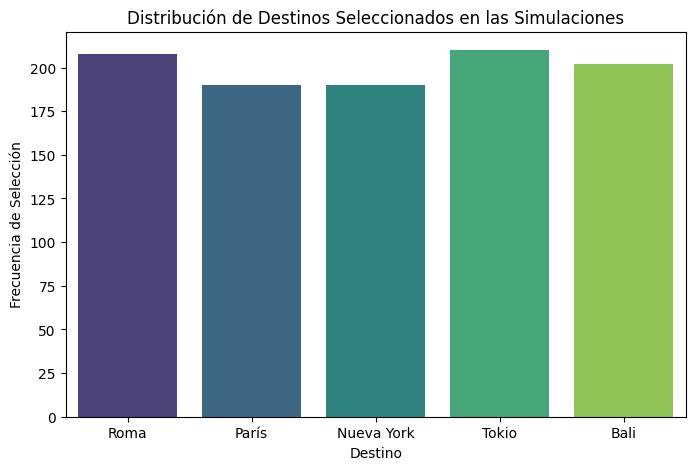

In [6]:
# Descripción del problema
# Se trata de un sistema de votación para decidir colectivamente un destino de vacaciones, basado en preferencias individuales.
# El sistema debe manejar paradojas de Condorcet y buscar una solución justa y eficiente.

# Definimos las preferencias aleatorias de los viajeros
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def generar_preferencias(num_personas, destinos):
    """
    Genera preferencias aleatorias para num_personas sobre una lista de destinos.
    Cada persona asigna un ranking único a cada destino.
    """
    preferencias = {}
    for i in range(num_personas):
        persona = f"Persona_{i+1}"
        preferencias[persona] = random.sample(destinos, len(destinos))
    return preferencias

# Algoritmo basado en preferencia ponderada

def metodo_preferencia_ponderada(preferencias, destinos, pesos):
    """
    Calcula la puntuación de cada destino usando una ponderación basada en la importancia de cada votante.
    """
    puntuaciones = {destino: 0 for destino in destinos}
    num_destinos = len(destinos)
    
    for persona, lista_prefs in preferencias.items():
        peso = pesos.get(persona, 1)  # Si no hay peso asignado, se asume 1
        for i, destino in enumerate(lista_prefs):
            puntuaciones[destino] += peso * (num_destinos - i)
    
    return max(puntuaciones, key=puntuaciones.get)  # Devuelve el destino con mayor puntuación

# Evaluación del algoritmo

def evaluar_algoritmo(num_simulaciones, num_personas, destinos, pesos):
    """
    Ejecuta múltiples simulaciones para evaluar la estabilidad del algoritmo.
    Métrica: Proporción de veces que el mismo destino es elegido.
    """
    resultados = []
    for _ in range(num_simulaciones):
        prefs = generar_preferencias(num_personas, destinos)
        ganador = metodo_preferencia_ponderada(prefs, destinos, pesos)
        resultados.append(ganador)
    
    conteo = Counter(resultados)
    estabilidad = max(conteo.values()) / num_simulaciones
    return estabilidad, conteo

# Visualización de los resultados
def graficar_distribucion_resultados(conteo_resultados):
    df_resultados = pd.DataFrame(conteo_resultados.items(), columns=["Destino", "Frecuencia"])
    plt.figure(figsize=(8,5))
    sns.barplot(x="Destino", y="Frecuencia", data=df_resultados, palette="viridis")
    plt.xlabel("Destino")
    plt.ylabel("Frecuencia de Selección")
    plt.title("Distribución de Destinos Seleccionados en las Simulaciones")
    plt.show()

# Ejecutar evaluación
destinos = ["París", "Tokio", "Nueva York", "Roma", "Bali"]
pesos = {"Persona_1": 2, "Persona_2": 1.5, "Persona_3": 1, "Persona_4": 1, "Persona_5": 1}  # Ejemplo de pesos
total_simulaciones = 1000

iestabilidad, conteo_resultados = evaluar_algoritmo(total_simulaciones, len(pesos), destinos, pesos)

print("Distribución de elecciones:", conteo_resultados)

graficar_distribucion_resultados(conteo_resultados)


/var/folders/rw/9dc4ss41167dpttmz9h6f1xr0000gn/T/ipykernel_78593/727145358.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Destino", y="Puntuación Ponderada", data=df_prefs, palette="viridis")


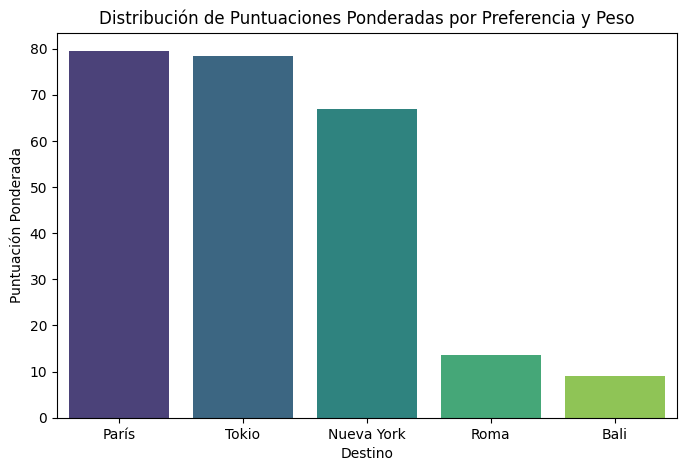


¡El sistema de inferencia decidió que iremos de vacaciones a 'París'!


In [12]:
# Descripción del problema
# Se trata de un sistema de votación para decidir colectivamente un destino de vacaciones, basado en preferencias individuales.
# El sistema debe manejar paradojas de Condorcet y buscar una solución justa y eficiente.

# Definimos los posibles destinos (nuestra "Base de Conocimientos")
destinos = ["París", "Tokio", "Nueva York", "Roma", "Bali"]

# Diccionario de preferencias (personas -> lista de destinos en orden de preferencia).
# Cada persona debe listar sus preferencias en el mismo orden y con la misma longitud
# que la lista de 'destinos'.
preferencias = {
    "Alice": ["París", "Tokio", "Nueva York", "Roma", "Bali"],
    "Bob":   ["Tokio", "Nueva York", "París", "Bali", "Roma"],
    "Carole": ["Nueva York", "París", "Tokio", "Roma", "Bali"],
}

# Pesos asignados a cada persona (ejemplo: prioridad según influencia o presupuesto)
pesos = {"Alice": 2, "Bob": 1.5, "Carole": 1}  

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def validate_preferences(preferencias, destinos):
    """
    Verifica que las preferencias sean válidas:
    - Mismo número de preferencias que destinos.
    - Destinos válidos dentro de la lista establecida.
    """
    for persona, prefs in preferencias.items():
        if len(prefs) != len(destinos):
            print(f"ERROR: {persona} no tiene suficientes preferencias.")
            return False
        for destino in prefs:
            if destino not in destinos:
                print(f"ERROR: {persona} incluyó un destino desconocido {destino}.")
                return False
    return True

# Algoritmo basado en preferencia ponderada con valores diferenciados por orden de preferencia
def metodo_preferencia_ponderada(preferencias, destinos, pesos):
    """
    Calcula la puntuación de cada destino usando una ponderación basada en la importancia de cada votante
    y asignando valores decrecientes según la posición en la lista de preferencias.
    """
    puntuaciones = {destino: 0 for destino in destinos}
    num_destinos = len(destinos)
    
    for persona, lista_prefs in preferencias.items():
        peso = pesos.get(persona, 1)  # Si no hay peso asignado, se asume 1
        for i, destino in enumerate(lista_prefs):
            factor_preferencia = (num_destinos - i) ** 2  # Penaliza más las posiciones más bajas
            puntuaciones[destino] += peso * factor_preferencia
    
    return max(puntuaciones, key=puntuaciones.get)  # Devuelve el destino con mayor puntuación

# Evaluación del algoritmo
def visualizar_distribuciones(preferencias, destinos, pesos):
    """
    Muestra distribuciones de preferencias considerando pesos y posiciones.
    """
    puntuaciones = {destino: 0 for destino in destinos}
    num_destinos = len(destinos)
    
    for persona, lista_prefs in preferencias.items():
        peso = pesos.get(persona, 1)
        for i, destino in enumerate(lista_prefs):
            factor_preferencia = (num_destinos - i) ** 2
            puntuaciones[destino] += peso * factor_preferencia
    
    df_prefs = pd.DataFrame(puntuaciones.items(), columns=["Destino", "Puntuación Ponderada"])
    plt.figure(figsize=(8,5))
    sns.barplot(x="Destino", y="Puntuación Ponderada", data=df_prefs, palette="viridis")
    plt.xlabel("Destino")
    plt.ylabel("Puntuación Ponderada")
    plt.title("Distribución de Puntuaciones Ponderadas por Preferencia y Peso")
    plt.show()

def evaluar_algoritmo(preferencias, destinos, pesos):
    """
    Ejecuta una evaluación del método y muestra el resultado final.
    """
    if validate_preferences(preferencias, destinos):
        visualizar_distribuciones(preferencias, destinos, pesos)
        ganador = metodo_preferencia_ponderada(preferencias, destinos, pesos)
        print(f"\n¡El sistema de inferencia decidió que iremos de vacaciones a '{ganador}'!")
    else:
        print("Por favor, corrige los errores en las preferencias y vuelve a ejecutar la celda.")

# Ejecutar evaluación
evaluar_algoritmo(preferencias, destinos, pesos)


In [17]:

def analyze_engine_coincidence(df_sims):
    """
    Analiza la coincidencia entre el motor de inferencia y los métodos de Borda y Condorcet.
    """
    total_sims = len(df_sims)
    if total_sims == 0:
        return {
            "engine_borda_coincidence": 0.0,
            "engine_condorcet_coincidence": 0.0
        }
    
    same_borda = (df_sims["winner"] == df_sims["winner_borda"]).sum()
    coincide_borda_pct = same_borda / total_sims
    
    df_condorcet = df_sims.dropna(subset=["winner_condorcet"])
    if len(df_condorcet) > 0:
        same_condorcet = (df_condorcet["winner"] == df_condorcet["winner_condorcet"]).sum()
        coincide_condorcet_pct = same_condorcet / len(df_condorcet)
    else:
        coincide_condorcet_pct = 0.0
    
    return {
        "engine_borda_coincidence": coincide_borda_pct,
        "engine_condorcet_coincidence": coincide_condorcet_pct
    }

In [ ]:
def analyze_engine_coincidence(df_sims):
    """
    Dado un DataFrame con columnas (al menos):
      - 'winner_engine': Ganador según el inference_engine.
      - 'winner_borda': Ganador Borda.
      - 'winner_condorcet': Ganador Condorcet (o None si no existe).

    Retorna un dict con:
      - 'engine_borda_coincidence': % de simulaciones donde engine == Borda.
      - 'engine_condorcet_coincidence': % de simulaciones donde engine == Condorcet,
        en aquellas simulaciones que tienen un condorcet winner (no None).
    """
    total_sims = len(df_sims)
    if total_sims == 0:
        return {
            "engine_borda_coincidence": 0.0,
            "engine_condorcet_coincidence": 0.0
        }

    same_borda = (df_sims["winner_engine"] == df_sims["winner_borda"]).sum()
    coincide_borda_pct = same_borda / total_sims

    df_condorcet = df_sims.dropna(subset=["winner_condorcet"])  # simulaciones c/ condorcet
    if len(df_condorcet) > 0:
        same_condorcet = (df_condorcet["winner_engine"] == df_condorcet["winner_condorcet"]).sum()
        coincide_condorcet_pct = same_condorcet / len(df_condorcet)
    else:
        coincide_condorcet_pct = 0.0

    return {
        "engine_borda_coincidence": coincide_borda_pct,
        "engine_condorcet_coincidence": coincide_condorcet_pct
    }

Distribución de destinos ganadores en las simulaciones:
winner
Roma          20.8
París         20.5
Nueva York    20.4
Bali          19.8
Tokio         18.5
Name: proportion, dtype: float64


/var/folders/rw/9dc4ss41167dpttmz9h6f1xr0000gn/T/ipykernel_78593/603982771.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")


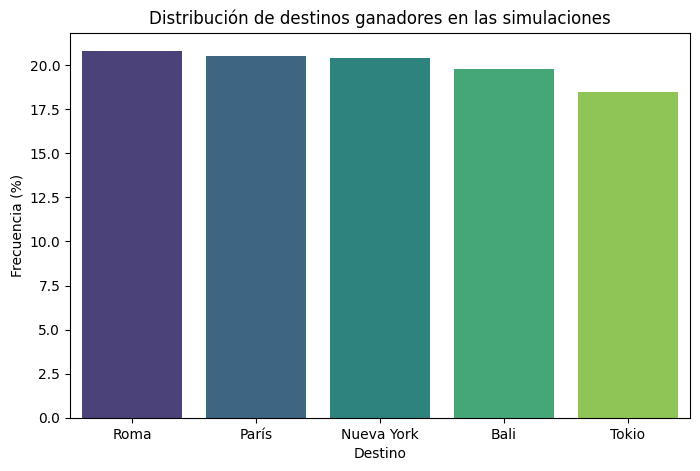

NameError: name 'v' is not defined

In [22]:
destinos = ["París", "Tokio", "Nueva York", "Roma", "Bali"]

# Parámetros de la simulación
NUM_RUNS = 1000
NUM_PEOPLE = 5

# Pesos asignados a cada persona (ejemplo: prioridad según influencia o presupuesto)
pesos = {f"Persona_{i+1}": random.uniform(1, 2) for i in range(NUM_PEOPLE)}
def run_many_simulations(num_runs, num_people, destinos, pesos):
    """
    Ejecuta múltiples simulaciones con preferencias aleatorias.
    """
    records = []
    for _ in range(num_runs):
        preferencias = generar_preferencias(num_people, destinos)
        ganador = metodo_preferencia_ponderada(preferencias, destinos, pesos)
        records.append({"winner": ganador})
    
    df_sims = pd.DataFrame(records)
    return df_sims

def analizar_resultados(df_sims):
    """
    Analiza la distribución de ganadores en las simulaciones.
    """
    conteo = df_sims["winner"].value_counts(normalize=True) * 100
    print("Distribución de destinos ganadores en las simulaciones:")
    print(conteo)
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")
    plt.xlabel("Destino")
    plt.ylabel("Frecuencia (%)")
    plt.title("Distribución de destinos ganadores en las simulaciones")
    plt.show()
# Ejecutar simulaciones
df_sims = run_many_simulations(NUM_RUNS, NUM_PEOPLE, destinos, pesos)
analizar_resultados(df_sims)
